# TP Support Vector Machines

author: Anastasios Giovanidis, date: March 2020

In [39]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import numpy as np
import pandas as pd
from sklearn import svm #.SVC, .NuSVC, .LinearSVC

### Some useful functions

In [40]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [41]:
def plot_contours(clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out


## SVM application to data

Application of SVM to various datasets that need to be loaded.

### Dataset 0

In [42]:
dataIN = pd.read_csv('15_svm_TP_Data/data0')
#dataIN
X = dataIN[['x','y']].to_numpy()
y = dataIN['Class'].to_numpy()

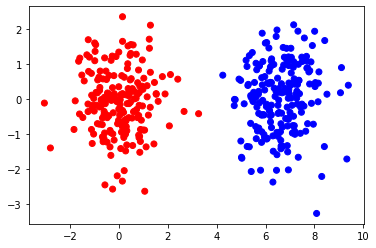

In [43]:
couleur = ('b','r','g')
cou = list()
for n in range(len(y)):
    cou.append(couleur[y[n]])
plt.scatter(X[:,0],X[:,1], color=cou)

- use linear SVM to find the separating hyperplane and plot it.
- use as Test set $[[0,0],[2,0],[4,0],[6,0]]$ to make predictions. Use Platt's probability estimates to quantify the confidence of decision.
- Plot the class contours.

**Answer**

In [44]:
clf = svm.SVC(C=1,kernel='linear',probability=True)
clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [45]:
Xtest=[[0,0],[2,0],[4,0],[6,0]]
print('Test_set:',Xtest)
print('Classification:', clf.predict(Xtest))
# Use Platt's probability estimates for confidence of decision
decision_proba = 1/(1+np.exp(clf.probA_[0]*clf.decision_function(Xtest)+clf.probB_[0]))
print('Decision_confidence:',decision_proba)

Test_set: [[0, 0], [2, 0], [4, 0], [6, 0]]
Classification: [1 1 0 0]
Decision_confidence: [0.99941067 0.96975485 0.37741984 0.01133191]


In [46]:
print('support vectors =', clf.support_vectors_)
print('coeficients w =', clf.coef_)
print('intercept b =', clf.intercept_)

support vectors = [[ 4.25032306  0.67104516]
 [ 5.01581545 -1.67433975]
 [ 3.26193396 -0.42899745]]
coeficients w = [[-1.2177068  -0.39743827]]
intercept b = [4.44234606]


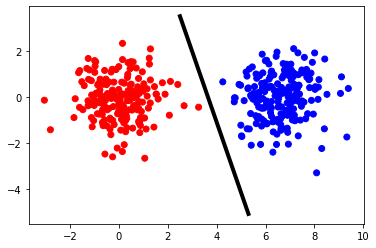

In [47]:
plt.scatter(X[:,0],X[:,1], color=cou)
xt = np.arange(2.5,5.5,0.2)
yt = -clf.coef_[0][0]/clf.coef_[0][1]*xt-clf.intercept_[0]/clf.coef_[0][1]
plt.plot(xt,yt,linewidth=4,color='black')

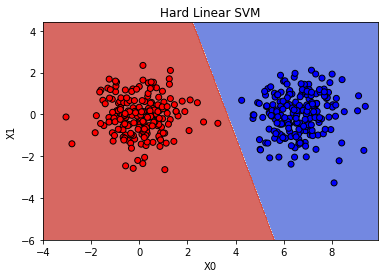

In [48]:
X0 = np.arange(-4,10,0.1)
X1 = np.arange(-6,4.5,0.1)
xx, yy = make_meshgrid(X0, X1)
plot_contours(clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:,0],X[:,1], color=cou, edgecolors='k')
plt.xlim(X0.min(), X0.max())
plt.ylim(X1.min(), X1.max())
plt.xlabel('X0')
plt.ylabel('X1')
#plt.xticks(())
#plt.yticks(())
plt.title('Hard Linear SVM')
plt.show()

### Dataset 1

In [49]:
dataIN = pd.read_csv('15_svm_TP_Data/data1')
#dataIN
X = dataIN[['x','y']].to_numpy()
y = dataIN['Class'].to_numpy()

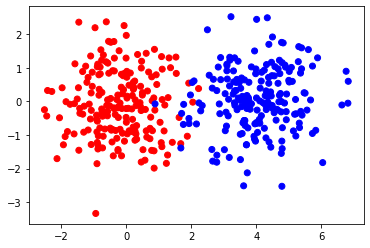

In [50]:
couleur = ('b','r','g')
cou = list()
for n in range(len(y)):
    cou.append(couleur[y[n]])
plt.scatter(X[:,0],X[:,1], color=cou)

- use linear SVM to find the (soft) separating hyperplane and plot it.
- Predict the Test set $[[0,0],[2,0],[4,0],[6,0]]$. Use Platt's probability estimates to quantify the confidence of decision.
- change the regularisation constant $C$ from $C=1$ to $C=30$ to see how the hyperplane direction changes.
- Plot the class contours.

**Answer**

### Dataset 2

In [51]:
dataIN = pd.read_csv('15_svm_TP_Data/data2')
#dataIN
X = dataIN[['x','y']].to_numpy()
y = dataIN['Class'].to_numpy()

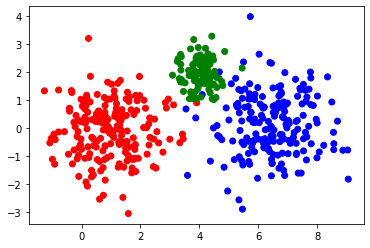

In [52]:
couleur = ('b','r','g')
cou = list()
for n in range(len(y)):
    cou.append(couleur[y[n]])
plt.scatter(X[:,0],X[:,1], color=cou)

- Find the 3 separating hyperplanes. Use the method one-vs-one.
- Predict for the Test data set: $[[0,0],[2,0],[4,0],[4,2],[5,2],[6,0],[8,0]]$. Use Platt's probability estimates to quantify the confidence of decision.
- Plot the class contours.

**Answer**

### Dataset 3

In [53]:
dataIN = pd.read_csv('15_svm_TP_Data/data3')
#dataIN
X = dataIN[['x','y']].to_numpy()
y = dataIN['Class'].to_numpy()

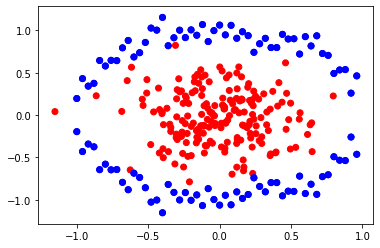

In [54]:
couleur = ('b','r','g')
cou = list()
for n in range(len(y)):
    cou.append(couleur[y[n]])
plt.scatter(X[:,0],X[:,1], color=cou)

- Find the separating curve. Use the Radial kernel.
- Predict for the Test data set: $[[-1,0],[0,0],[1,0],[1,1]]$. Use Platt's probability estimates to quantify the confidence of decision.
- Plot the class contours.

**Answer**

### Dataset 4

In [55]:
dataIN = pd.read_csv('15_svm_TP_Data/data4')
#dataIN
X = dataIN[['x','y']].to_numpy()
y = dataIN['Class'].to_numpy()

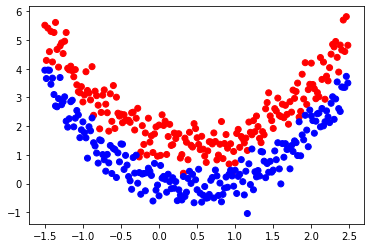

In [56]:
couleur = ('b','r','g')
cou = list()
for n in range(len(y)):
    cou.append(couleur[y[n]])
plt.scatter(X[:,0],X[:,1], color=cou)

- Classify with SVM using polynomial kernel using the degree $d=2$ and $d=3$.
- Predict the Test set: $[[-1.5,2],[-0.5,2],[0.5,2],[2,1]]$. Use Platt's probability estimates to quantify the confidence of decision.
- Plot the class contours.

**Answer**

**END**